In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate

In [2]:
df = pd.read_csv('./ratings_small.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
reader = Reader(line_format='user item rating timestamp')
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader=reader)

In [4]:
# Part C
user_cf = {'user_based': True}
item_cf = {'user_based': False}

pmf_performance = cross_validate(SVD(), data, verbose=True)
user_cf_performance = cross_validate(KNNBasic(sim_options=user_cf), data, verbose=True)
item_cf_performance = cross_validate(KNNBasic(sim_options=item_cf), data, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8991  0.8903  0.8956  0.8955  0.9000  0.8961  0.0034  
MAE (testset)     0.6922  0.6894  0.6886  0.6872  0.6924  0.6900  0.0020  
Fit time          3.63    3.51    3.69    3.55    3.49    3.57    0.07    
Test time         0.12    0.10    0.10    0.15    0.15    0.13    0.02    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9674  0.9638  0.9838  0.9623  0.9640  0.9683  0.0079

In [5]:
# Part D
print('=== RMSE Metric ===')
print('Probabilistic Matrix Factorization Error:', pmf_performance['test_rmse'].mean())
print('User-based Collaborative Filtering Error:', user_cf_performance['test_rmse'].mean())
print('Item-based Collaborative Filtering Error:', item_cf_performance['test_rmse'].mean())
print()
print('=== MAE Metric ===')
print('Probabilistic Matrix Factorization Error:', pmf_performance['test_mae'].mean())
print('User-based Collaborative Filtering Error:', user_cf_performance['test_mae'].mean())
print('Item-based Collaborative Filtering Error:', item_cf_performance['test_mae'].mean())

=== RMSE Metric ===
Probabilistic Matrix Factorization Error: 0.8960967795863304
User-based Collaborative Filtering Error: 0.9682682123005517
Item-based Collaborative Filtering Error: 0.9348820491561604

=== MAE Metric ===
Probabilistic Matrix Factorization Error: 0.6899637058779154
User-based Collaborative Filtering Error: 0.7440853687411525
Item-based Collaborative Filtering Error: 0.7212636724106888


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases usi

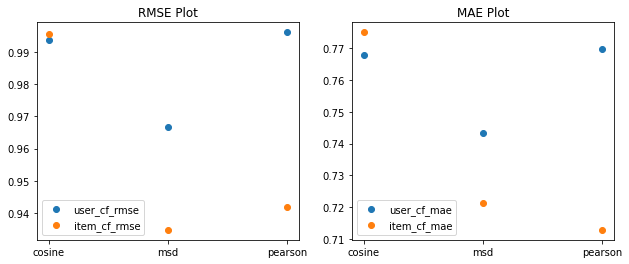

In [6]:
# Part E

# Creating similarity metrics
user_cf_cosine = {'name': 'cosine', 'user_based': True}
user_cf_msd = {'name': 'MSD', 'user_based': True}
user_cf_pearson = {'name': 'pearson_baseline', 'user_based': True}

item_cf_cosine = {'name': 'cosine', 'user_based': False}
item_cf_msd = {'name': 'MSD', 'user_based': False}
item_cf_pearson = {'name': 'pearson_baseline', 'user_based': False}

# Cross-Validation calculations
user_cf_cosine_performance = cross_validate(KNNBasic(sim_options=user_cf_cosine), data)
user_cf_msd_performance = cross_validate(KNNBasic(sim_options=user_cf_msd), data)
user_cf_pearson_performance = cross_validate(KNNBasic(sim_options=user_cf_pearson), data)

item_cf_cosine_performance = cross_validate(KNNBasic(sim_options=item_cf_cosine), data)
item_cf_msd_performance = cross_validate(KNNBasic(sim_options=item_cf_msd), data)
item_cf_pearson_performance = cross_validate(KNNBasic(sim_options=item_cf_pearson), data)

# Graphing
names = ['cosine', 'msd', 'pearson']
values_user_rmse = [user_cf_cosine_performance['test_rmse'].mean(),
                    user_cf_msd_performance['test_rmse'].mean(),
                    user_cf_pearson_performance['test_rmse'].mean()]
values_item_rmse = [item_cf_cosine_performance['test_rmse'].mean(),
                    item_cf_msd_performance['test_rmse'].mean(),
                    item_cf_pearson_performance['test_rmse'].mean()]
values_user_mae = [user_cf_cosine_performance['test_mae'].mean(),
                   user_cf_msd_performance['test_mae'].mean(),
                   user_cf_pearson_performance['test_mae'].mean()]
values_item_mae = [item_cf_cosine_performance['test_mae'].mean(),
                   item_cf_msd_performance['test_mae'].mean(),
                   item_cf_pearson_performance['test_mae'].mean()]

plt.figure(figsize=(16,4))

plt.subplot(131)
plt.scatter(names, values_user_rmse, label='user_cf_rmse')
plt.scatter(names, values_item_rmse, label='item_cf_rmse')
plt.legend()
plt.title('RMSE Plot')
plt.subplot(132)
plt.scatter(names, values_user_mae, label='user_cf_mae')
plt.scatter(names, values_item_mae, label='item_cf_mae')
plt.title('MAE Plot')
plt.legend()
plt.show()

In [7]:
# Part F
user_cf = {'user_based': True}
item_cf = {'user_based': False}

user_accuracy_rmse = []
item_accuracy_rmse = []
user_accuracy_mae = []
item_accuracy_mae = []
for i in range(5, 51, 5):
    print('# of k-neighbors:', i)
    user_cf_performance = cross_validate(KNNBasic(k=i, sim_options=user_cf), data, verbose=False)
    item_cf_performance = cross_validate(KNNBasic(k=i, sim_options=item_cf), data, verbose=False)
    user_accuracy_rmse.append(user_cf_performance['test_rmse'].mean())
    user_accuracy_mae.append(user_cf_performance['test_mae'].mean())
    item_accuracy_rmse.append(item_cf_performance['test_rmse'].mean())
    item_accuracy_mae.append(item_cf_performance['test_mae'].mean())

# of k-neighbors: 5
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
# of k-neighbors: 10
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing 

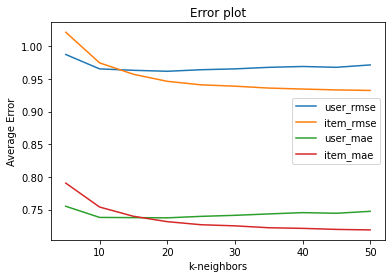

In [8]:
# Part F (Continued)
x = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.plot(x, user_accuracy_rmse, label='user_rmse')
plt.plot(x, item_accuracy_rmse, label='item_rmse')
plt.plot(x, user_accuracy_mae, label='user_mae')
plt.plot(x, item_accuracy_mae, label='item_mae')
plt.legend()
plt.title('Error plot')
plt.xlabel('k-neighbors')
plt.ylabel('Average Error')
plt.show()